In [1]:
import pandas as pd 
import numpy as np
from sklearn.metrics import confusion_matrix,roc_curve
from sklearn.preprocessing import OneHotEncoder,TargetEncoder,StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier


In [2]:
df=pd.read_csv('Network_Intrusion.csv')

In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [5]:
df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.0,0.0,1.0,1.0,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.0,0.0,0.0,0.0,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.0,0.0,1.0,1.0,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.0,1.0,0.0,0.0,anomaly
25191,0,tcp,finger,S0,0,0,0,0,0,0,...,49,0.19,0.03,0.01,0.00,1.0,1.0,0.0,0.0,anomaly


In [6]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [7]:
df['service'].value_counts()

service
http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: count, Length: 66, dtype: int64

In [8]:
df['land'].value_counts()

land
0    25190
1        2
Name: count, dtype: int64

In [9]:
df=df.drop(['land','urgent','num_shells','su_attempted','root_shell','num_file_creations','num_outbound_cmds','is_host_login'],axis=1)

In [10]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,logged_in,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,1,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,1,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,1,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [11]:
for i in df:
    #print(df[i].dtypes)
    if df[i].dtypes=='object':
        #print(i)
        print(df[i].value_counts())
        print('\n')
        

protocol_type
tcp     20526
udp      3011
icmp     1655
Name: count, dtype: int64


service
http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: count, Length: 66, dtype: int64


flag
SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH           5
Name: count, dtype: int64


class
normal     13449
anomaly    11743
Name: count, dtype: int64




In [12]:
#p=np.array(df['protocol_type']).reshape(-1,1)

In [13]:
#tr=TargetEncoder()
#df['service']=tr.fit_transform(df['service'],df['src_bytes'])

In [14]:
#df[['flag','service','protocol_type']].apply(lambda s: s.map(df['price'].groupby(s).mean()))
lb=LabelEncoder()
df['service']=lb.fit_transform(df['service'])
df['flag']=lb.fit_transform(df['flag'])
df['protocol_type']=lb.fit_transform(df['protocol_type'])
df['class']=lb.fit_transform(df['class'])

In [15]:
df['protocol_type']

0        1
1        2
2        1
3        1
4        1
        ..
25187    1
25188    1
25189    1
25190    1
25191    1
Name: protocol_type, Length: 25192, dtype: int32

In [16]:
#df=pd.get_dummies(df,columns=['protocol_type','service','flag'])
#df=df.apply(df['flag','service','protocol_type']map.(lambda x: x.mean()))

In [17]:
df.corr()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,logged_in,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
duration,1.000000,0.036421,0.101301,-0.066634,0.084864,0.013258,-0.010358,0.004202,0.011108,-0.063703,...,-0.112530,-0.119321,0.263489,0.240970,-0.025485,-0.066513,-0.066240,0.187070,0.208435,-0.050901
protocol_type,0.036421,1.000000,0.025322,0.094926,-0.001286,-0.004734,0.176420,-0.011589,-0.003305,-0.101810,...,0.104292,0.004797,0.131609,-0.206137,-0.360518,-0.080432,-0.079086,-0.018424,-0.047182,0.283653
service,0.101301,0.025322,1.000000,-0.295491,0.008554,-0.013782,0.088169,-0.056165,0.029601,-0.138824,...,-0.409442,-0.450546,0.280962,-0.101749,-0.153359,0.276906,0.273472,0.141211,0.142865,-0.270494
flag,-0.066634,0.094926,-0.295491,1.000000,-0.006599,0.027606,0.068693,0.067027,-0.010920,0.587882,...,0.584087,0.634415,-0.284016,0.194528,0.078870,-0.447140,-0.447007,-0.680849,-0.716075,0.651309
src_bytes,0.084864,-0.001286,0.008554,-0.006599,1.000000,0.003611,-0.000916,0.000995,-0.000260,-0.002040,...,-0.008520,-0.006776,0.001026,0.002316,-0.001238,-0.006346,-0.006227,-0.002130,0.006190,-0.005743
dst_bytes,0.013258,-0.004734,-0.013782,0.027606,0.003611,1.000000,-0.003586,0.002539,0.005197,0.012704,...,-0.000980,0.022392,-0.012971,0.024078,-0.006006,-0.015584,-0.014543,-0.014094,-0.012803,0.010949
wrong_fragment,-0.010358,0.176420,0.088169,0.068693,-0.000916,-0.003586,1.000000,-0.008386,-0.002392,-0.073674,...,-0.047256,-0.051845,0.053177,0.034670,-0.020174,-0.053786,-0.057230,0.027718,-0.034143,-0.097625
hot,0.004202,-0.011589,-0.056165,0.067027,0.000995,0.002539,-0.008386,1.000000,0.004893,0.113115,...,-0.048495,-0.033442,-0.007962,-0.030640,-0.021170,-0.055628,-0.056255,-0.027628,-0.029719,0.012839
num_failed_logins,0.011108,-0.003305,0.029601,-0.010920,-0.000260,0.005197,-0.002392,0.004893,1.000000,-0.006872,...,-0.022315,-0.003336,0.000298,-0.008910,-0.007551,-0.009527,-0.010238,0.016791,0.018693,-0.000028
logged_in,-0.063703,-0.101810,-0.138824,0.587882,-0.002040,0.012704,-0.073674,0.113115,-0.006872,1.000000,...,0.624839,0.607379,-0.255820,-0.159278,-0.057390,-0.490450,-0.492446,-0.274430,-0.270507,0.688084


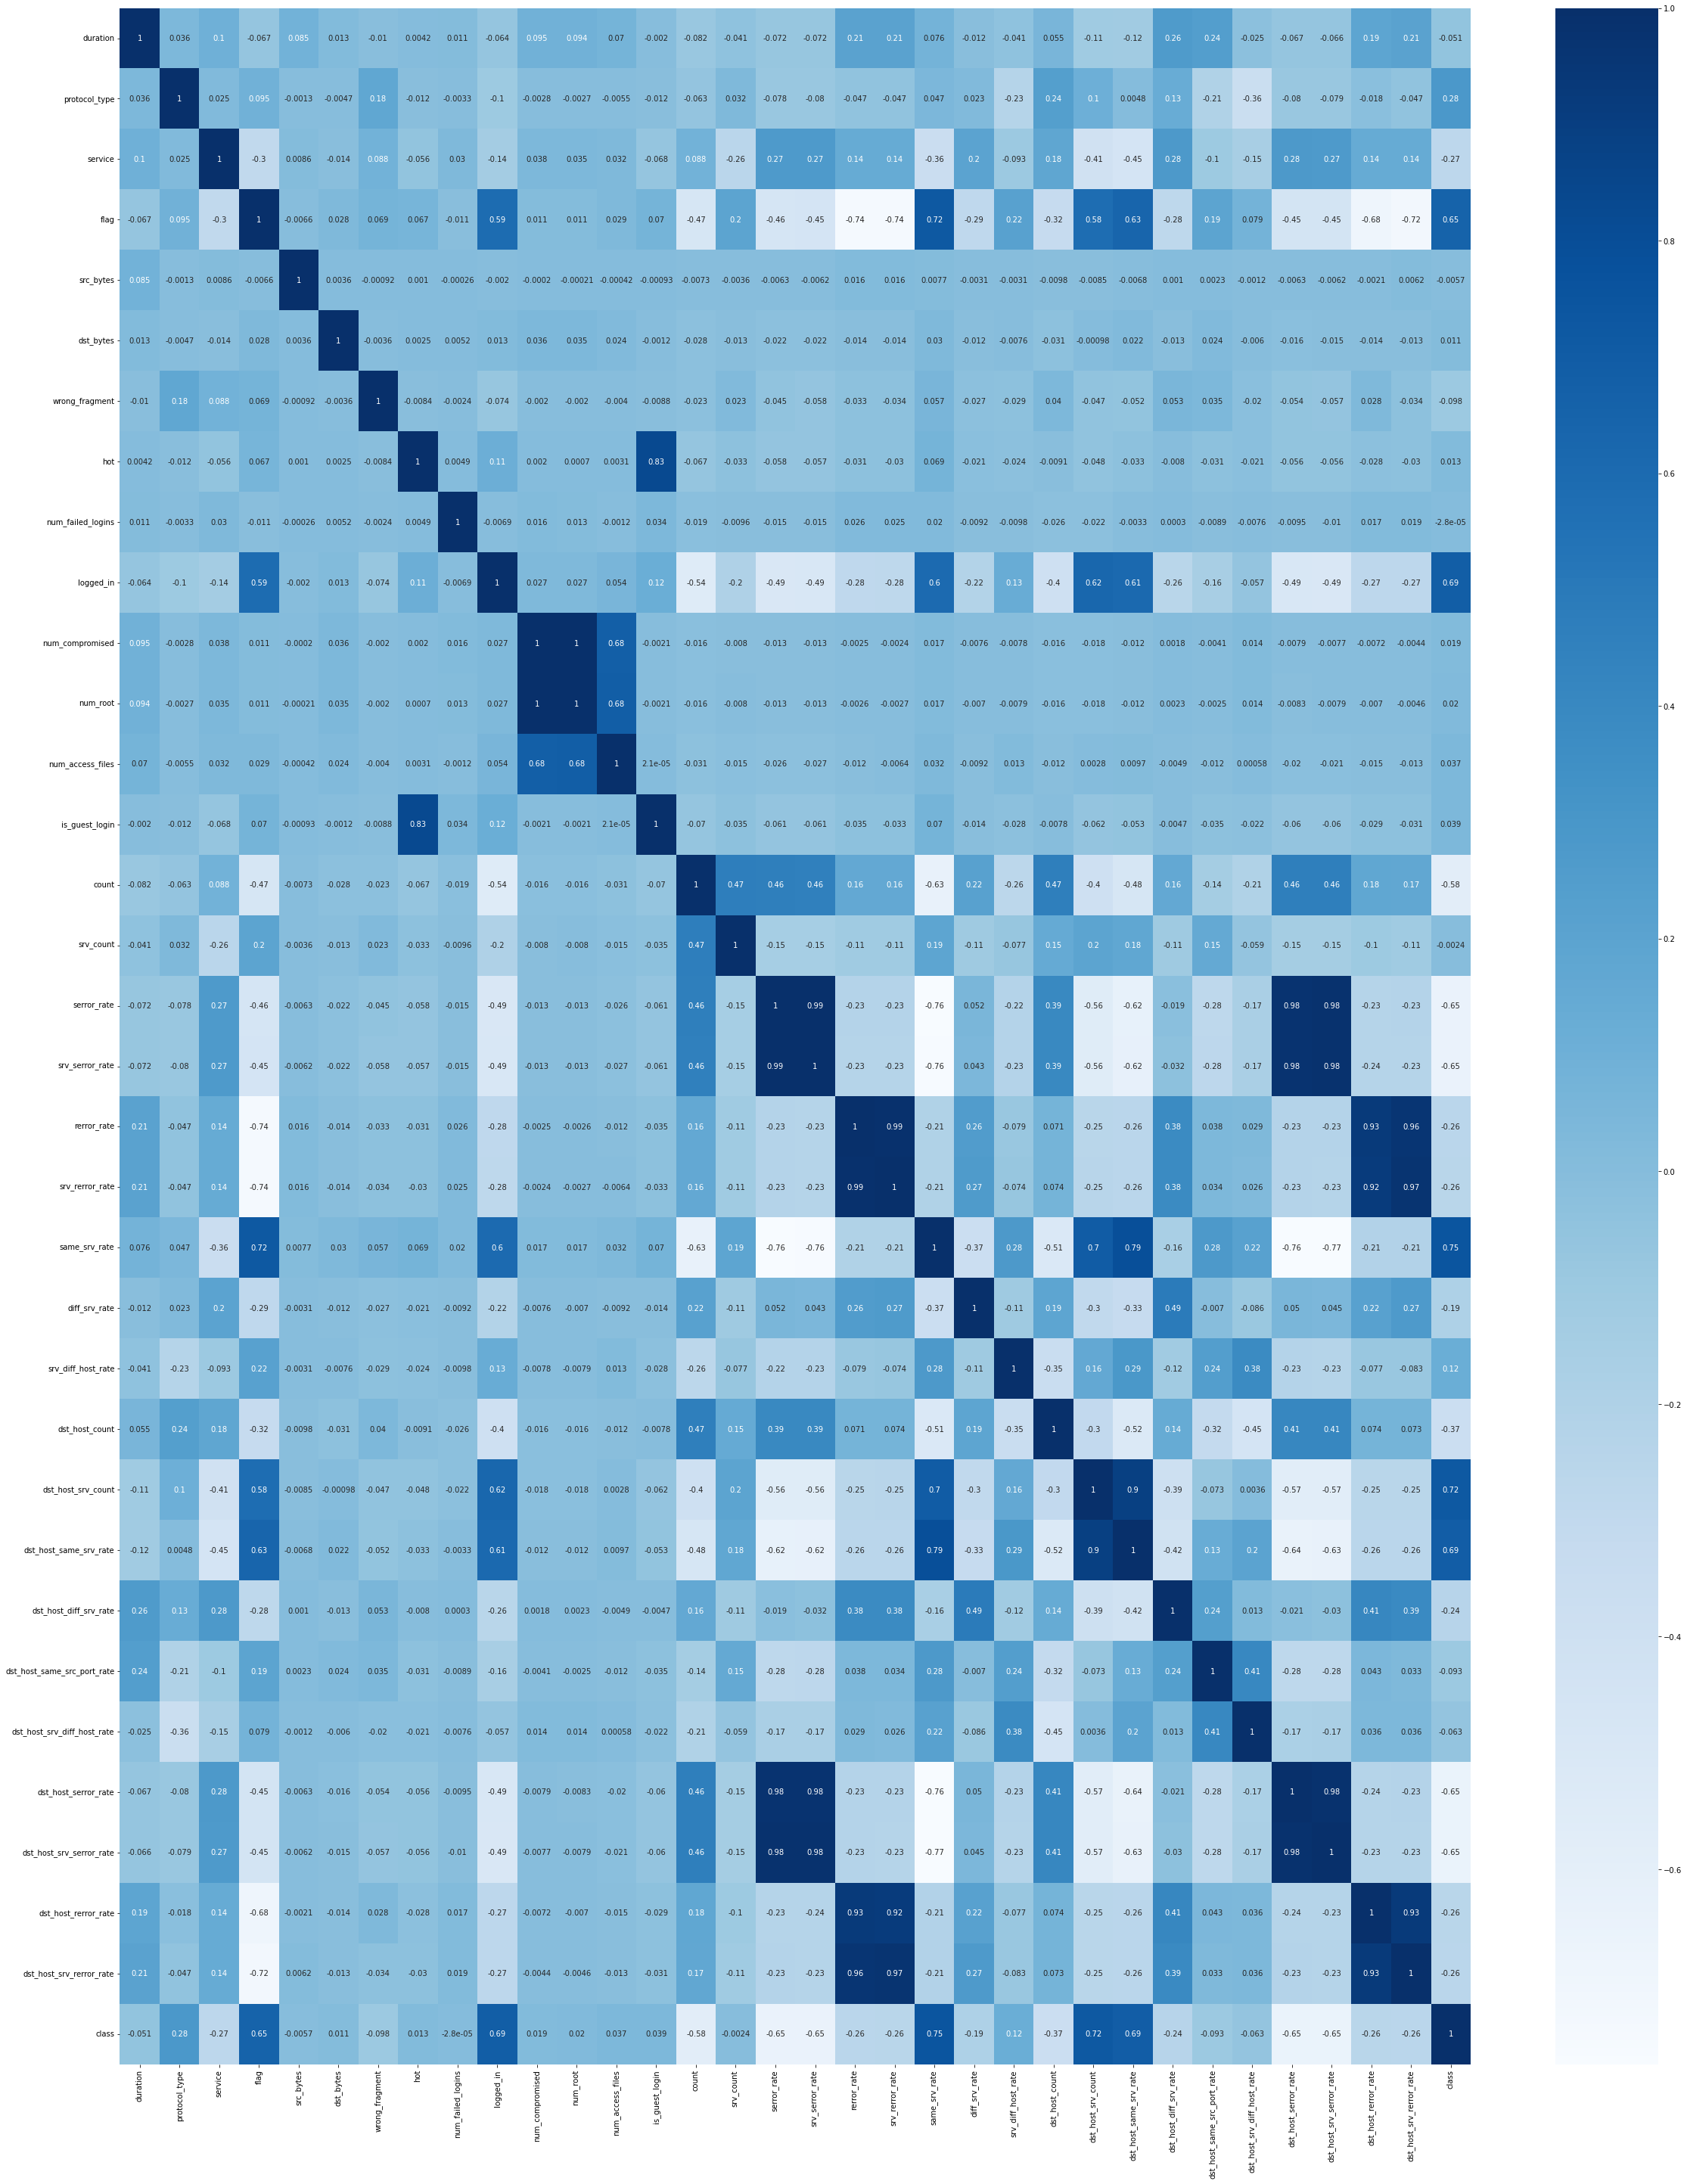

In [18]:
plt.subplots(figsize=(40,50))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [19]:
df=df.drop(['rerror_rate','srv_rerror_rate','dst_host_same_srv_rate','num_compromised','hot'],axis=1)

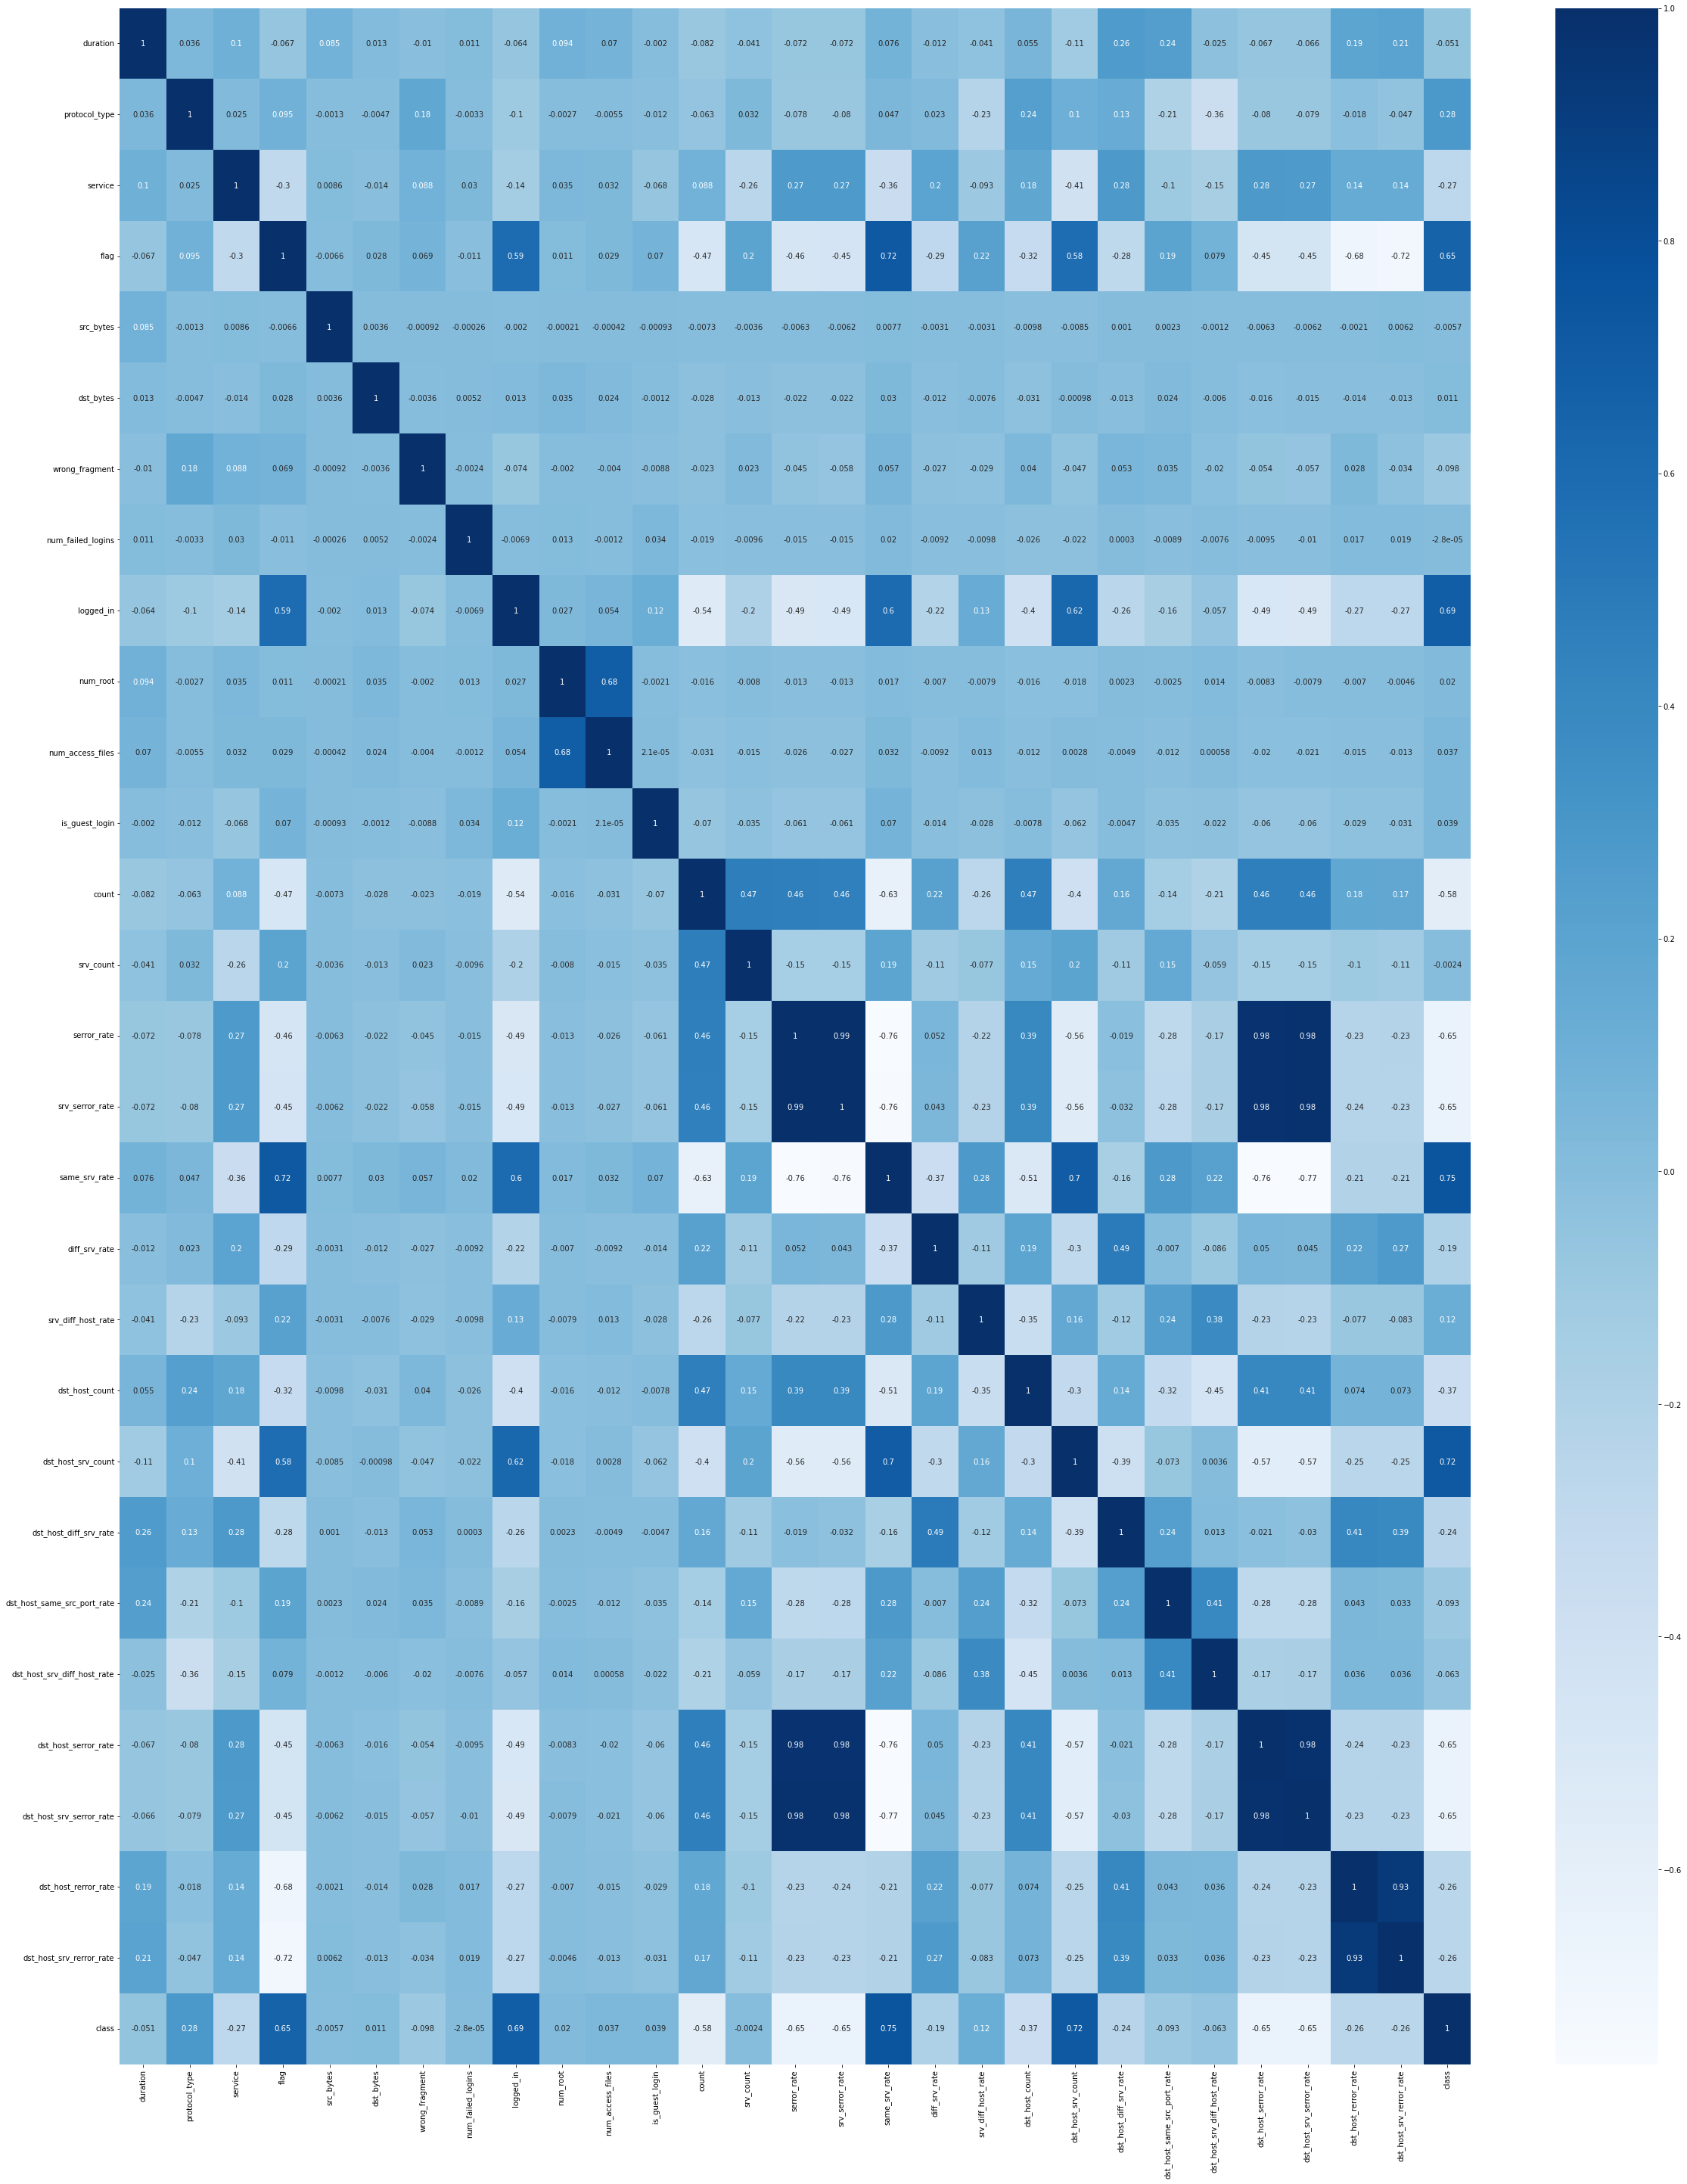

In [20]:
plt.subplots(figsize=(40,50))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [21]:
df=df.drop(['dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_serror_rate'],axis=1)

In [22]:
df.shape

(25192, 26)

In [23]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
wrong_fragment                 0
num_failed_logins              0
logged_in                      0
num_root                       0
num_access_files               0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_srv_rerror_rate       0
class                          0
dtype: int64

In [24]:
df=df.apply(lambda x: x.fillna(method='ffill'))

C:\Users\Samiksha\AppData\Local\Temp\ipykernel_3124\3553985893.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.apply(lambda x: x.fillna(method='ffill'))


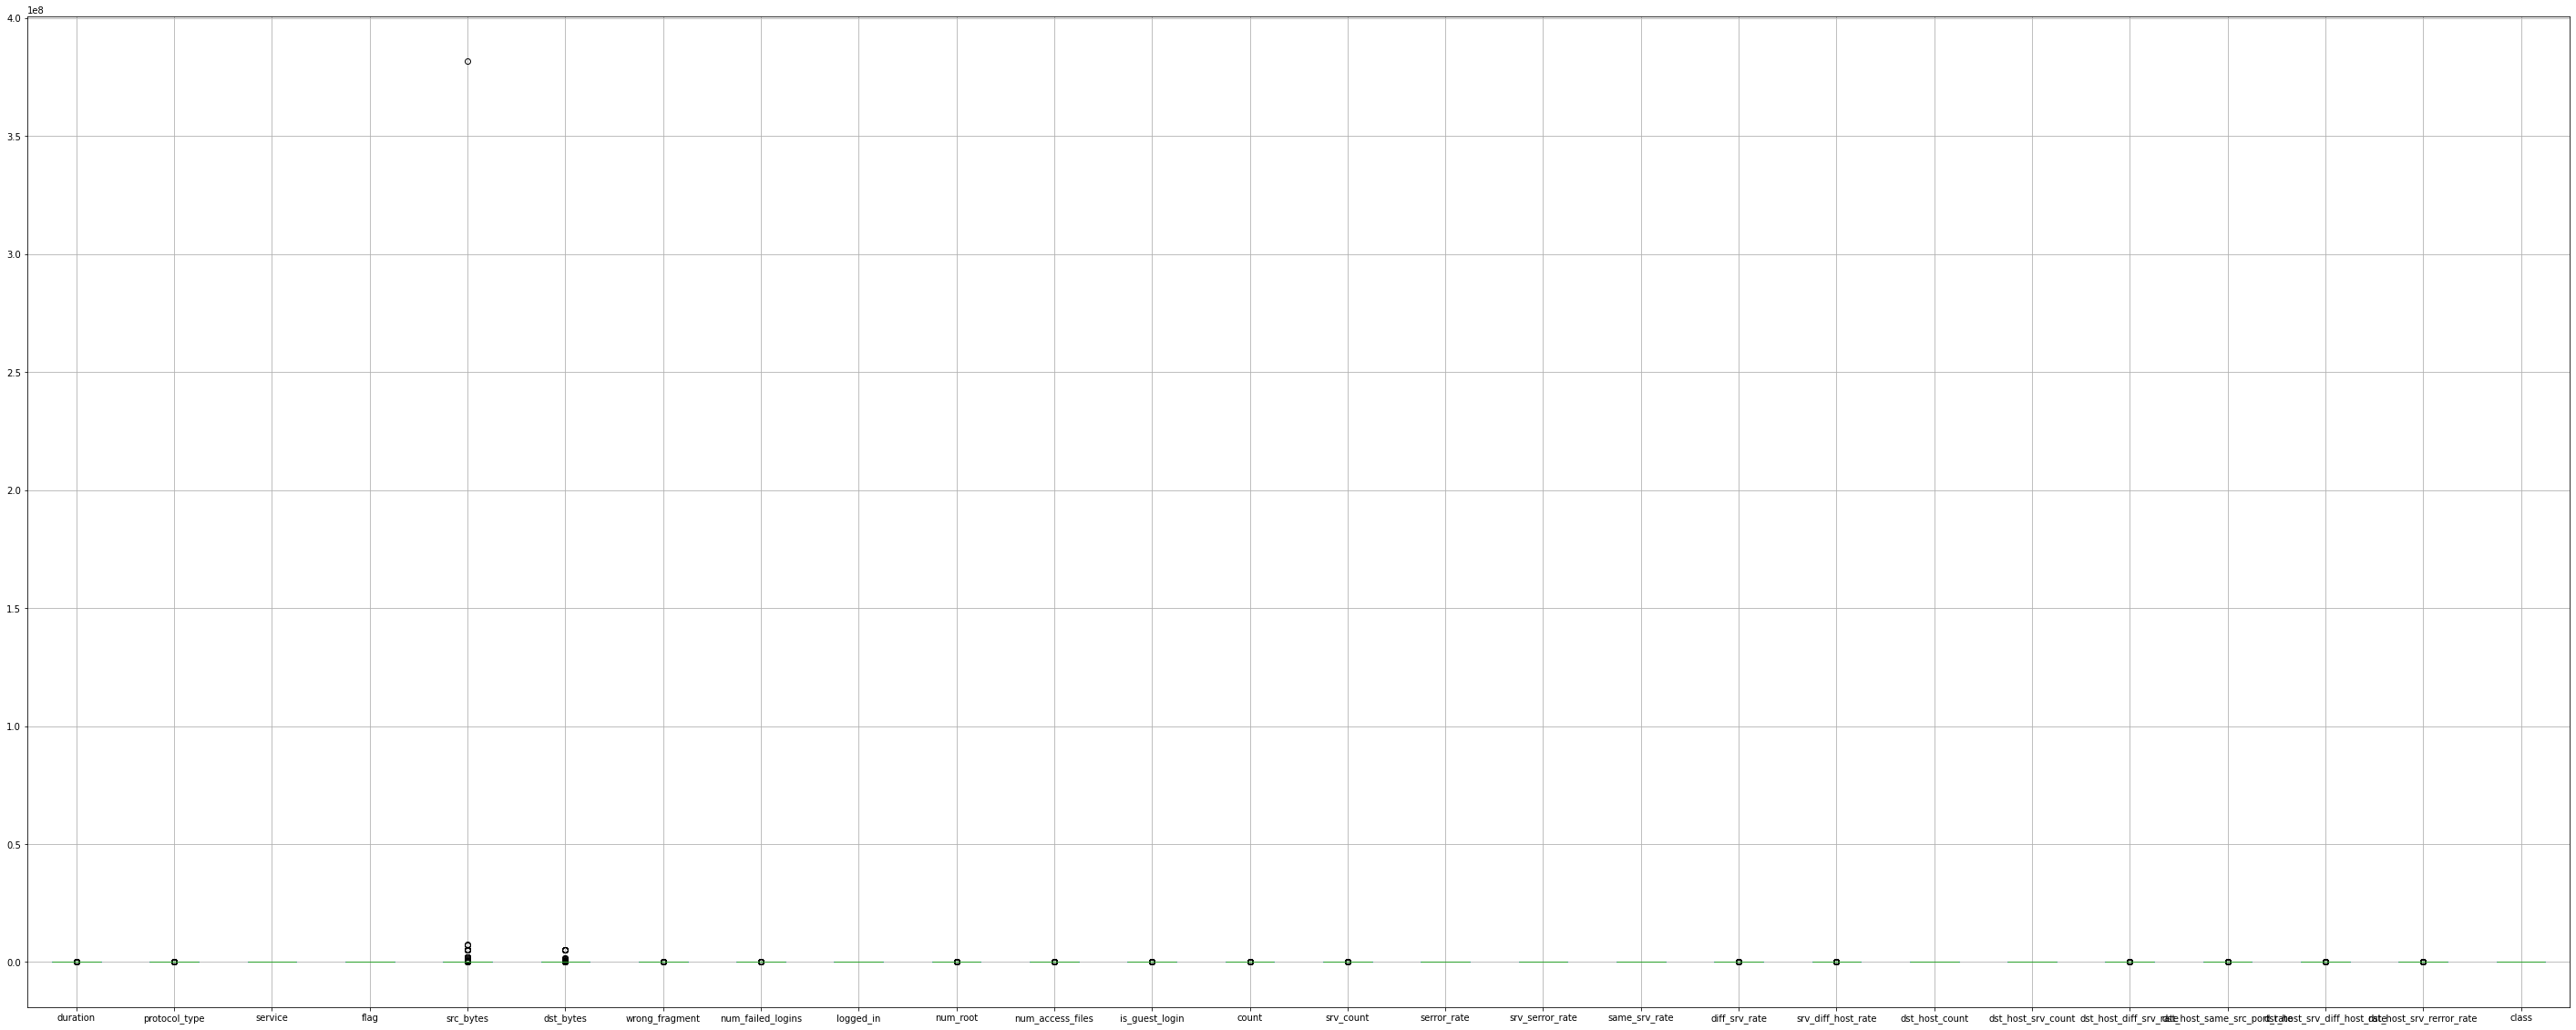

In [26]:
#outlier
df.boxplot(figsize=(50,20))
plt.show()

In [27]:
x=df.drop(['class'],axis=1)
y=df['class']

In [28]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=False)
x_train.shape,y_train.shape


((18894, 25), (18894,))

In [29]:
st=StandardScaler()
x_train1=st.fit_transform(x_train)
x_test1=st.transform(x_test)

In [30]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()#max_depth=5,min_samples_leaf=5
r.fit(x_train1,y_train)

RandomForestClassifier()

In [31]:
y_pred=r.predict(x_test1)

In [32]:
y_pred

array([1, 0, 1, ..., 1, 1, 0])

In [33]:
confusion_matrix(y_pred,y_test)

array([[2900,    8],
       [  11, 3379]], dtype=int64)

In [34]:
#r.score(x_test,y_test)

In [35]:
#roc_curve(y_pred,y_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9969831692600826

In [37]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.9976380277531739

In [38]:
from sklearn.model_selection import GridSearchCV
params={'n_estimators':list(range(10,17)),'max_samples':list(range(5,9)),'max_features':list(range(3,7))}
grid=GridSearchCV(r,params)

In [39]:
grid

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [3, 4, 5, 6],
                         'max_samples': [5, 6, 7, 8],
                         'n_estimators': [10, 11, 12, 13, 14, 15, 16]})

In [40]:
grid.fit(x_train1,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [3, 4, 5, 6],
                         'max_samples': [5, 6, 7, 8],
                         'n_estimators': [10, 11, 12, 13, 14, 15, 16]})

In [41]:
grid.best_estimator_

RandomForestClassifier(max_features=3, max_samples=7, n_estimators=15)

In [42]:
grid.best_score_

0.9115060927801533

In [43]:
y_test

15378    1
48       0
6910     1
7849     0
19598    0
        ..
12973    1
778      0
10164    1
3899     1
748      0
Name: class, Length: 6298, dtype: int32

In [48]:
array=np.array(x_test)[0]

In [58]:
a=array.reshape(1,25)

In [59]:
grid.predict(a)

array([1])